# Topic Models 
               * Partially based on Notebook for COMP90042, Web search and Text Analysis*, @UniMelb 



---


#USED WHEN:


#*   CLASSES ARE NOT KNOWN AND CAN DYNAMICALLY CHANGE
#*   EACH DOCUMENT CAN BE ASSIGNED TO MANY CLASSES

#E.g., find trending topics on Twitter/organize a large collection of documents 


---

# A 100-topic LDA model to 17,000 articles from the journal Science (from Blei et al., 2012).
![alt text](https://deliveryimages.acm.org/10.1145/2140000/2133826/figs/f2.jpg)



In this notebook we will use Gensim to train topic models on the Brown corpus. For this notebook, we will consider paragraphs as documents, for the sake of efficiency. In a real world scenario, you will probably deal with full documents instead. 
Let's start by reading the Brown corpus as a list of paragraphs.

# Load the data

In [0]:
import nltk
nltk.download('brown')

from nltk.corpus import brown

docs = list(brown.paras())
for doc in docs:
  print(doc)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']]
[['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']]
[['The', 'September-October', 'term', 'jury', 'had', 'been', 'charged', 'by', 'Fulton', 'Superior', 'Court', 'Judge', 'Durwood', 'Pye', 'to', 'investigate', 'reports', 'of', 'possible', '``', 'irregularities', "''", 'in', 'the', 'hard-fought', 'primary', 'which', 'was', 'won', 'b

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[['``', 'Board', 'meeting', 'tonight', ',', 'Cady', "''", '?', '?']]
[['``', 'No', ',', 'I', 'begged', 'off', '.'], ['Work', 'to', 'do', "''", '.']]
[['``', 'Can', 'I', 'have', 'the', 'car', ',', 'Dad', "''", '?', '?']]
[['``', 'Why', 'not', 'let', 'him', 'take', 'it', ',', 'Cady', '?', '?'], ['I', 'know', 'it', 'is', 'midweek', ',', 'but', "it's", 'only', 'eight', 'days', 'before', 'commencement', '.'], ["Let's", 'forget', 'the', 'rules', "''", '.']]
[['Cady', ',', 'deep', 'in', 'thought', ',', 'neither', 'heard', 'nor', 'answered', '.']]
[['David', 'grinned', '.'], ['Carefully', 'he', 'put', 'down', 'his', 'steak', 'knife', 'and', 'said', 'loudly', ',', '``', 'Mr.', 'Chairman', "''", '!', '!']]
[['Cady', "Partlow's", 'head', 'came', 'up', 'like', 'that', 'of', 'the', 'proverbial', 'fire', 'horse', '.'], ['``', "I'm", 'sorry', ',', 'Dave', '.'], ['The', 'car', '?', '?'], ['Of', 'course', 'you', 'can', 'have', 'it', "''", '.']]
[['Dave', 'ate', 'two', 'pieces', 'of', 'pie', 'as', 'he'

Now let's train a topic model on this data using Gensim. There are a range of models available but for this notebook we will stick to standard Latent Semantic Analysis (LSA) and Latent Dirichlet Allocation (LDA).

Before we do that though, we need to preprocess the data a bit in order for it to be read by Gensim: 

1) we will flatten each document into a single list; 

2) build a dictionary mapping words to ids;

and 3) generate a bag-of-words representation (token_id, token_freq.) for each document using the word ids.

# Generate a BOW representation

In [0]:
import gensim as gs

flat_docs = [[w for s in d for w in s] for d in docs]
brown_dict = gs.corpora.dictionary.Dictionary(flat_docs)
bow_docs = [brown_dict.doc2bow(d) for d in flat_docs]
for bow_doc in bow_docs:
   print(bow_doc)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)]
[(0, 1), (1, 1), (8, 1), (9, 1), (12, 2), (17, 3), (22, 1), (23, 1), (25, 2), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 6), (46, 1), (47, 2)]
[(0, 1), (1, 1), (5, 1), (8, 1), (9, 1), (15, 1), (17, 1), (19, 1), (36, 1), (37, 1), (38, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)]
[(0, 2), (1, 1), (9, 2), (12, 1), (17, 3), (22, 1), (25, 3), (30, 1), (37, 1), (38, 1), (45, 5), (46, 1), (64, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Create Models
Now we are ready to train a topic model. 

First, let's start with LSA (which is typically faster, it takes the TF matrix and runs SVD on it).

Notice we give a few parameters to the model:

- The number of topics.
- The dictionary.

In [0]:
lsi = gs.models.lsimodel.LsiModel(corpus=bow_docs, id2word=brown_dict, num_topics=100)
lsi.print_topics(10)

[(0,
  '0.539*"the" + 0.488*"," + 0.349*"." + 0.327*"of" + 0.228*"and" + 0.210*"to" + 0.168*"a" + 0.163*"in" + 0.087*"is" + 0.085*"that"'),
 (1,
  '0.604*"," + -0.582*"the" + -0.358*"of" + 0.201*"." + 0.108*"he" + 0.096*"was" + 0.095*"a" + 0.095*"``" + 0.094*"\'\'" + 0.093*"I"'),
 (2,
  '0.621*"." + -0.538*"," + -0.260*"of" + 0.189*"was" + 0.168*"to" + 0.153*"a" + 0.127*"he" + 0.123*"I" + 0.095*"had" + 0.094*"He"'),
 (3,
  '0.578*"of" + -0.565*"the" + 0.259*"a" + 0.226*"is" + -0.190*"," + 0.167*"." + -0.133*"was" + 0.126*"to" + 0.114*"in" + -0.102*"he"'),
 (4,
  '0.594*"and" + -0.520*"to" + -0.231*"``" + -0.228*"\'\'" + 0.172*"." + -0.164*"is" + 0.152*"was" + -0.150*"that" + -0.138*"be" + -0.137*"?"'),
 (5,
  '-0.631*"to" + -0.388*"and" + 0.328*"." + 0.219*"\'\'" + 0.218*"``" + 0.168*"is" + -0.166*";" + -0.154*"he" + -0.145*"was" + 0.142*","'),
 (6,
  '0.406*"of" + -0.372*"is" + 0.322*"was" + -0.288*"." + 0.287*"a" + 0.221*"``" + 0.219*"\'\'" + 0.209*"he" + 0.205*"his" + -0.171*"are"')

Now let's try LDA (which is a EM-based generative model)

Notice we give a few parameters to the model:

- The number of topics.
- The dictionary.
- How many passes in the training data. This relates to training algorithm but to simplify: more passes usually better but take longer.
- The random state, since training is not deterministic.

In [0]:
import numpy as np
ldamodel = gs.models.ldamodel.LdaModel(bow_docs, num_topics=10, id2word=brown_dict, 
                                       passes=10, random_state=np.random.RandomState(10))
print(ldamodel)

LdaModel(num_terms=56057, num_topics=10, decay=0.5, chunksize=2000)


Let's now inspect the learned topics. To do this, we will print word lists for each topic and manually inspect if we can infer any meaning from these lists.

In [0]:
topics = ldamodel.print_topics(num_words=20)
print(topics)

[(0, '0.028*"." + 0.027*"the" + 0.022*"Af" + 0.020*"and" + 0.013*"is" + 0.011*"a" + 0.009*"(" + 0.009*"," + 0.009*"of" + 0.009*")" + 0.007*"are" + 0.006*"The" + 0.006*"with" + 0.006*"by" + 0.006*"used" + 0.005*"for" + 0.005*"to" + 0.005*"sat" + 0.004*"in" + 0.004*"A"'), (1, '0.075*"the" + 0.056*"of" + 0.047*"," + 0.037*"." + 0.030*"to" + 0.025*"in" + 0.025*"and" + 0.020*"is" + 0.018*"a" + 0.013*"that" + 0.011*"be" + 0.011*"for" + 0.009*"as" + 0.008*"are" + 0.008*"The" + 0.007*"or" + 0.007*"by" + 0.006*"this" + 0.006*"which" + 0.006*"not"'), (2, '0.013*"." + 0.012*"the" + 0.009*"The" + 0.007*"of" + 0.007*"at" + 0.005*"," + 0.005*"and" + 0.005*"process" + 0.005*"in" + 0.004*"myself" + 0.004*"a" + 0.004*"image" + 0.003*"remembered" + 0.003*"for" + 0.003*"pool" + 0.003*"to" + 0.003*"by" + 0.003*"kill" + 0.003*"will" + 0.003*"write"'), (3, '0.004*"cattle" + 0.004*"rifle" + 0.004*"," + 0.004*"eye" + 0.003*"tiny" + 0.003*"sections" + 0.003*"grass" + 0.003*"tongue" + 0.003*"trees" + 0.003*"hum

Notice that for every topic we have a list of numbers/words. The numbers represent the probability of word appearing given the topic (check this). However, this output is hard to interpret so let's format to a more friendly format.

In [0]:
def pprint_topics(ldamodel, num_words=20):
    topics = ldamodel.print_topics(num_words=num_words)
    word_lists = [(t[0], t[1]) for t in topics]
    word_lists = [(t[0], [w.split('*')[1] for w in t[1].split(' + ')]) for t in word_lists]
    topic_ids = [t[0] for t in word_lists]
    word_lists = [' '.join([w[1:-1] for w in t[1]]) for t in word_lists]
    for t_id, w_list in zip(topic_ids, word_lists):
        print('%d:\t%s' % (t_id, w_list))

pprint_topics(ldamodel, num_words=20)

0:	. the Af and is a ( , of ) are The with by used for to sat in A
1:	the of , . to in and is a that be for as are The or by this which not
2:	. the The of at , and process in myself a image remembered for pool to by kill will write
3:	cattle rifle , eye tiny sections grass tongue trees human sounded chemical foam Pete food fed sat shadow shore dawn
4:	; ( ) , : and The platform 1 cells data Rachel Arlene radio . musical sets stuff pictures Hanover
5:	the , . and a to was of in his he had that with on her it He at him
6:	, seemed else Not hadn't Mike or you're Yes nice . -- a covered energy mean human physical neck smile
7:	Do water Maybe strange knife nobody stone of with narrow constant reasonable . smoke clay notes by Hans C P
8:	, the of and . in a for was ; The at by to on New with were year from
9:	. `` '' , I ? you to ! said it me a my have that -- your do we


# Evaluate Models
Let's evaluate the model!

In [0]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(bow_docs))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=flat_docs, dictionary=brown_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.317502649417079

Coherence Score:  0.3630741980045821


Hard to understand what's happening, right? 

# Don't Forget about Preprocessing
This is because we did not do any preprocessing on the corpus.
So let's do some preprocessing steps. These might take a few seconds to run.

- lowercase words
- ignore punctuation
- remove stopwords
- lemmatise words

# Stopwords
Let's also look at stopwords. Beware, stopword lists might be inconsistent (See more in Nothman et al.,2018  "Stop Word Lists in Free Open-source Software Packages")

In [0]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
print(sorted(stopwords))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', '

So, we can manually modify the stopword list

In [0]:
stopwords.extend(['from', 'dont', 'didnt', 'doesnt', 'subject', 're', 'edu','shall', 'use'])
print(sorted(stopwords))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'didnt', 'do', 'does', 'doesn', "doesn't", 'doesnt', 'doing', 'don', "don't", 'dont', 'down', 'during', 'each', 'edu', 'few', 'for', 'from', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 're', 's', 'same', 'shall', 'shan', "shan't", 'she', "she's", 'sh

# Normalisation: Lemmatisation vs. Stemming

Lemmatisation is a linguistics-based normalisation (language specific) and requires disctionaries


In [0]:
import nltk
#lemmatisation
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
print (lemmatizer.lemmatize('went', 'v'))
print (lemmatizer.lemmatize('running', 'v'))
print (lemmatizer.lemmatize('stemming', 'v'))
print (lemmatizer.lemmatize('stemmerize', 'v'))



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
go
run
stem
stemmerize


Stemming is a rule-based method

In [0]:
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")
print(stemmer.stem("went"))
print(stemmer.stem("running"))
print(stemmer.stem("stemming"))
print(stemmer.stem("stemmerize"))

went
run
stem
stemmer


# Put Everything Together

In [0]:
import nltk
nltk.download('wordnet')

lemmatizer = nltk.stem.wordnet.WordNetLemmatizer()
#stopwords = list(nltk.corpus.stopwords.words())

def preprocess_docs(corpus, stopwords):
    new_corpus = []
    for doc in corpus:
        new_doc = []
        for word in doc:
            if not word.isalpha():
                continue
            new_word = word.lower()
            if new_word in stopwords:
                continue
            new_word = lemmatize(new_word)
            new_doc.append(new_word)
        new_corpus.append(new_doc)
    return new_corpus


def lemmatize(word):
    lemma = lemmatizer.lemmatize(word,'v')
    if lemma == word:
        lemma = lemmatizer.lemmatize(word,'n')
    return lemma
  

filtered_docs = preprocess_docs(flat_docs, stopwords)
brown_dict = gs.corpora.dictionary.Dictionary(filtered_docs)
bow_docs = [brown_dict.doc2bow(d) for d in filtered_docs]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#Re-train the Models

Now let's train a new topic model on the filtered data and check what we come up with.

In [0]:
ldamodel = gs.models.ldamodel.LdaModel(bow_docs, num_topics=10, id2word=brown_dict, 
                                       passes=10, random_state=np.random.RandomState(10))
pprint_topics(ldamodel, num_words=30)

0:	water new one force land two shoulder build river time ship city mile year line area air would day make coat house heat inch boat cold car north south road
1:	drink use finally make glass paint eat rock bottle kitchen dry clean doctor snake shout yes space cut cover swing water strange body color c length direction show piece also
2:	af always hell wash line sample ask trial two forget remember point number morgan describe give experiment charlie define order u pleasure p transfer careful jazz effect hate sir action
3:	say like man know look one eye sit hand think voice moment love little woman could never girl god hair window make sound see child hear horse oh live stand
4:	morning gun inside finger wonder distance ten nice blood death gray imagine cousin circle considerable become always data refuse exercise roof century friendly certainly adjust pain indeed swell internal tractor
5:	state system cost increase year program make per number may type provide area service business dev

Much better now, right? Not every topic is 100% interpretable but some insights can be made. Notice that some words appear in more than one topic: this is expected in LDA.

Let's check topics for a simple document "light science north":

In [0]:
ldamodel[brown_dict.doc2bow('light science north'.split())]

[(0, 0.31032556),
 (1, 0.025),
 (2, 0.025),
 (3, 0.025),
 (4, 0.025002358),
 (5, 0.025),
 (6, 0.025000673),
 (7, 0.025003454),
 (8, 0.48966795),
 (9, 0.025)]


Now let's evaluate our model!


In [0]:
# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(bow_docs))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=filtered_docs, dictionary=brown_dict, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.741332559362885

Coherence Score:  0.4383275686046969


#Find The Best Model
Now let's try to find the optimal number of topics. 

In [0]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for n_topics in range(start, limit, step):
        model = gs.models.ldamodel.LdaModel(corpus, num_topics=n_topics, id2word=dictionary, 
                                       passes=10, random_state=np.random.RandomState(10))
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
  

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=brown_dict, corpus=bow_docs, texts=filtered_docs, start=2, limit=10, step=3)

Now we will plot it

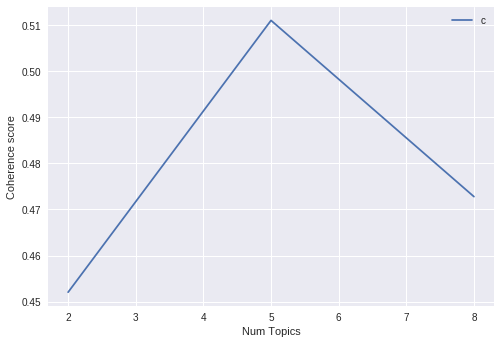

In [0]:
# Making a plot
import matplotlib.pyplot as plt
limit=10; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [0]:
# Print the values
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.452
Num Topics = 5  has Coherence Value of 0.5111
Num Topics = 8  has Coherence Value of 0.4728
